In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, recall_score ,precision_score, accuracy_score

In [9]:
df = pd.read_csv('Customer-Churn-Records.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [12]:
label = LabelEncoder()

In [13]:
df['Gender'] = label.fit_transform(df['Gender'])

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [28]:
ohn = OneHotEncoder(sparse_output=False)

In [29]:
encoded_df = ohn.fit_transform(df[['Geography']])

In [30]:
ohn.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [31]:
geo_df = pd.DataFrame(encoded_df, columns=ohn.get_feature_names_out())

In [32]:
geo_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [33]:
df = pd.concat([df, geo_df], axis=1)

In [34]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,...,1,101348.88,1,1,2,DIAMOND,464,1.0,0.0,0.0
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,...,1,112542.58,0,1,3,DIAMOND,456,0.0,0.0,1.0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,...,0,113931.57,1,1,3,DIAMOND,377,1.0,0.0,0.0
3,4,15701354,Boni,699,France,0,39,1,0.00,2,...,0,93826.63,0,0,5,GOLD,350,1.0,0.0,0.0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,...,1,79084.10,0,0,5,GOLD,425,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,...,0,96270.64,0,0,1,DIAMOND,300,1.0,0.0,0.0
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,...,1,101699.77,0,0,5,PLATINUM,771,1.0,0.0,0.0
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,...,1,42085.58,1,1,3,SILVER,564,1.0,0.0,0.0
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,...,0,92888.52,1,1,2,GOLD,339,0.0,1.0,0.0


In [35]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [38]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname','Geography', 'Gender', 'Card Type'], axis=1)

In [39]:
df.iloc[50:55]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain
50,698,44,10,116363.37,2,1,0,198059.16,0,0,4,829,0.0,1.0,0.0
51,585,36,5,146050.97,2,0,0,86424.57,0,0,3,665,0.0,1.0,0.0
52,788,33,5,0.00,2,0,0,116978.19,0,0,3,982,1.0,0.0,0.0
53,655,41,8,125561.97,1,0,0,164040.94,1,1,3,343,0.0,1.0,0.0
54,601,42,1,98495.72,1,1,0,40014.76,1,1,2,225,0.0,1.0,0.0


In [41]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [43]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=124)

In [44]:
model_gb = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000)

In [45]:
model_gb.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.01
,n_estimators,1000
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [51]:
print('Accuracy\n', model_gb.score(X_train, y_train))

Accuracy
 0.9998571428571429


In [52]:
print('Accuracy\n', model_gb.score(X_test, y_test))

Accuracy
 0.9983333333333333


In [53]:
y_pred = model_gb.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2410
           1       0.99      1.00      1.00       590

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [56]:
model_gb.feature_importances_

array([1.04076407e-04, 2.30838334e-04, 1.85586951e-05, 2.31896423e-03,
       9.12367904e-05, 5.70331071e-06, 0.00000000e+00, 2.44563025e-03,
       9.94393477e-01, 1.14425891e-04, 2.64301390e-04, 0.00000000e+00,
       1.27877226e-05, 0.00000000e+00])

In [57]:
column = np.array(X.columns)

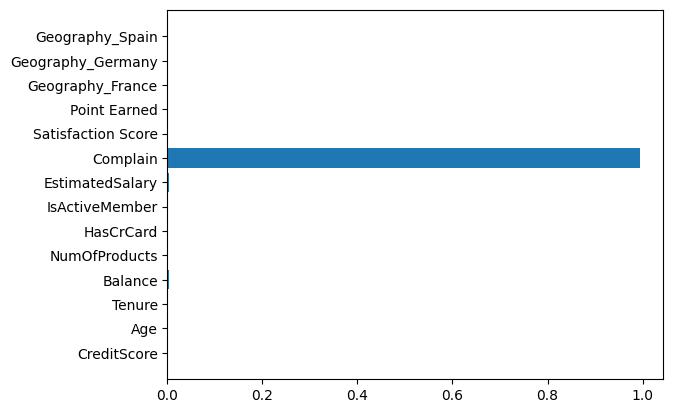

In [58]:
plt.barh(column, model_gb.feature_importances_, align="center")
plt.show()

In [59]:
import joblib

In [ ]:
joblib.dump(model_gb, 'GradientBoosting_model.pkl')
joblib.dump(label, 'gradient_label.pkl')
joblib.dump(ohn, 'gradient_ohe.pkl')
